<a href="https://colab.research.google.com/github/mcellot/Catalogacion-y-Monitoreo-de-Fauna-Amenazada-en-Venezuela/blob/main/Proyecto_sunsamg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


modelo redirigdo a clasificacion de animales con base de vgg16


In [ ]:
import shutil
import os

train_checkpoints_path = os.path.join(train_dir, ".ipynb_checkpoints")

# Verifica si la carpeta existe y elimínala
if os.path.exists(train_checkpoints_path):
    shutil.rmtree(train_checkpoints_path)
    print("📂 Carpeta '.ipynb_checkpoints' eliminada con éxito.")
else:
    print("✅ No se encontró la carpeta '.ipynb_checkpoints'.")


✅ No se encontró la carpeta '.ipynb_checkpoints'.


In [ ]:
import shutil
import os

# Define la ruta para la carpeta de testeo
test_dir = "/content/drive/MyDrive/dataset_peligro_de_extincion/test"  # Reemplaza esto con tu ruta correspondiente
test_checkpoints_path = os.path.join(test_dir, ".ipynb_checkpoints")

# Verifica si la carpeta existe y elimínala
if os.path.exists(test_checkpoints_path):
    shutil.rmtree(test_checkpoints_path)
    print("📂 Carpeta '.ipynb_checkpoints' eliminada con éxito en el directorio de testeo.")
else:
    print("✅ No se encontró la carpeta '.ipynb_checkpoints' en el directorio de testeo.")


📂 Carpeta '.ipynb_checkpoints' eliminada con éxito en el directorio de testeo.


Modelo de 16 Categorias

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from google.colab import drive

# ------------------------------------------------------------------------------

# 1. Cargar el modelo VGG16 preentrenado
# ------------------------------------------------------------------------------

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base
for layer in base_model.layers:
    layer.trainable = False

# ------------------------------------------------------------------------------

# 2. Agregar capas personalizadas encima del modelo base
# ------------------------------------------------------------------------------

x = base_model.output
x = Flatten()(x)  # Aplanar la salida
x = Dense(256, activation='relu')(x)  # Capa densa
x = Dropout(0.5)(x)  # Capa de Dropout
predictions = Dense(16, activation='softmax')(x)  # Capa de salida

# Definir el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Crear generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Definir las rutas a tus carpetas de entrenamiento y validación
train_dir = '/content/drive/MyDrive/dataset_peligro_de_extincion/train'
validation_dir = '/content/drive/MyDrive/dataset_peligro_de_extincion/test'

# Generador para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb")

# Generador para el conjunto de validación
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb")

print("Clases en entrenamiento:", train_generator.class_indices)
print("Clases en validación:", validation_generator.class_indices)

# ------------------------------------------------------------------------------

# 4. Entrenar el modelo
# ------------------------------------------------------------------------------

model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),
    validation_data=validation_generator,
    validation_steps=max(1, validation_generator.samples // validation_generator.batch_size),
    epochs=20)

# Guardar el modelo entrenado
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Modelos/modelo_vgg16_v4_16cat3.h5')


Found 2770 images belonging to 16 classes.
Found 160 images belonging to 16 classes.
Clases en entrenamiento: {'Perico Multicolor': 0, 'Tortuga arrau': 1, 'ballena de aletas': 2, 'gato tigre': 3, 'jaguar': 4, 'jicotea': 5, 'la cotorra cabeciamarilla': 6, 'manati de las Indias': 7, 'mono araña': 8, 'mono nocturno': 9, 'oso andino': 10, 'oso hormiguero gigante': 11, 'pato de torrente': 12, 'paují de yelmo': 13, 'tonina': 14, 'venado andino': 15}
Clases en validación: {'Perico Multicolor': 0, 'Tortuga arrau': 1, 'ballena de aletas': 2, 'gato tigre': 3, 'jaguar': 4, 'jicotea': 5, 'la cotorra cabeciamarilla': 6, 'manati de las Indias': 7, 'mono araña': 8, 'mono nocturno': 9, 'oso andino': 10, 'oso hormiguero gigante': 11, 'pato de torrente': 12, 'paují de yelmo': 13, 'tonina': 14, 'venado andino': 15}
Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 60s 665ms/step - accuracy: 0.1777 - loss: 2.6651 - val_accuracy: 0.4938 - val_loss: 1.7647
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accura

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Para fines de ejemplo

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# ------------------------------------------------------------------------------
# 1. Cargar el modelo VGG16 preentrenado (sin la parte superior, es decir, sin
#    las capas densas de clasificación originales). Esto permite agregar nuevas
#    capas personalizadas para tu propio conjunto de clases.
# ------------------------------------------------------------------------------
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Congelar las capas del modelo base para evitar que sus pesos se modifiquen en el
# entrenamiento inicial. Luego puedes descongelar algunas capas para fine-tuning.
for layer in base_model.layers:
    layer.trainable = False

# ------------------------------------------------------------------------------
# 2. Agregar capas personalizadas encima del modelo base
# ------------------------------------------------------------------------------
x = base_model.output
x = Flatten()(x)                     # Aplanar la salida para conectarla a capas densas
x = Dense(256, activation='relu')(x)   # Capa densa de 256 neuronas con activación ReLU
x = Dropout(0.5)(x)                  # Capa de Dropout para evitar overfitting

# Capa de salida: si yo vi el video
# - Si tienes, por ejemplo, 2 clases, usa 2 neuronas y activación softmax.
# - Si tienes más clases, cambia el número '2' al número de clases que tengas.
predictions = Dense(16, activation='softmax')(x)

# Definir el modelo final uniendo el modelo base con las nuevas capas
model = Model(inputs=base_model.input, outputs=predictions)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


# Crear generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,           # Normalización de imágenes
    shear_range=0.2,          # Transformaciones para aumentar la variedad
    zoom_range=0.2,
    horizontal_flip=True)

validation_datagen = ImageDataGenerator(rescale=1./255)

# Define las rutas a tus carpetas de entrenamiento y validación
train_dir = '/content/drive/MyDrive/dataset_peligro_de_extincion/train'
validation_dir = '/content/drive/MyDrive/dataset_peligro_de_extincion/test'

# Generador para el conjunto de entrenamiento
train_generator = train_datagen.flow_from_directory(train_dir,
    target_size=(224, 224),   # Redimensionar imágenes para que coincidan con el input del modelo
    batch_size=32,
    class_mode='categorical',
    color_mode="rgb")  # Asegurar que todas las imágenes sean RGB
 # 'categorical' para clasificación multiclase


# Generador para el conjunto de validación
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",  # Asegurar que todas las imágenes sean RGB ok pero tengo q subir la data vdd

    class_mode='categorical')
print("Clases en entrenamiento:", train_generator.class_indices)
print("Clases en prueba:", validation_generator.class_indices)
# ------------------------------------------------------------------------------
# 4. Entrenar el modelo dale pe dejemops este
# ------------------------------------------------------------------------------
model.fit(
    train_generator,
    steps_per_epoch=max(1, train_generator.samples // train_generator.batch_size),#train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=max(1, validation_generator.samples // validation_generator.batch_size),#validation_generator.samples // validation_generator.batch_size,
    epochs=20) # Puedes ajustar el número de epochs según sea necesario

# Guardar el modelo entrenado #ok:((((((((((((((((((((((()))))))))))))))))))))))
model.save('modelo_vgg16_v4_16cat2.h5')
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/Modelos/modelo_vgg16_v4_16cat2.h5')


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Found 2770 images belonging to 16 classes.
Found 160 images belonging to 16 classes.
Clases en entrenamiento: {'Perico Multicolor': 0, 'Tortuga arrau': 1, 'ballena de aletas': 2, 'gato tigre': 3, 'jaguar': 4, 'jicotea': 5, 'la cotorra cabeciamarilla': 6, 'manati de las Indias': 7, 'mono araña': 8, 'mono nocturno': 9, 'oso andino': 10, 'oso hormiguero gigante': 11, 'pato de torrente': 12, 'paují de yelmo': 13, 'tonina': 14, 'venado andino': 15}
Clases en prueba: {'Perico Multicolor': 0, 'Tortuga arrau': 1, 'ballena de aletas': 2, 'gato tigre': 3, 'jaguar': 4, 'jicotea': 5, 'la cotorra cabeciamarilla': 6, 'manati de las Indias': 7, 'mono araña': 8, 'mono nocturno': 9, 'oso andino': 10, 'oso hormiguero gigante': 11, 'pato de torrente': 12, 'paují de yelmo': 13, 'tonina': 14, 'venado andino': 15}


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 1183s 27s/step - accuracy: 0.1492 - loss: 2.7637 - val_accuracy: 0.4844 - val_loss: 1.9418
Epoch 2/20
 1/43 ━━━━━━━━━━━━━━━━━━━━ 10s 262ms/step - accuracy: 0.3438 - loss: 2.1463

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


43/43 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.3438 - loss: 2.1463 - val_accuracy: 0.4922 - val_loss: 1.9032
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 91s 1s/step - accuracy: 0.4417 - loss: 1.8510 - val_accuracy: 0.7031 - val_loss: 1.3165
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.5312 - loss: 1.4720 - val_accuracy: 0.7188 - val_loss: 1.2611
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.5574 - loss: 1.4477 - val_accuracy: 0.7109 - val_loss: 1.1579
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.6562 - loss: 1.3089 - val_accuracy: 0.7422 - val_loss: 1.0910
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step - accuracy: 0.6420 - loss: 1.2202 - val_accuracy: 0.7734 - val_loss: 0.9650
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.6250 - loss: 1.1527 - val_accuracy: 0.7500 - val_loss: 0.9887
Epoch 9/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 82s 1s/step - accuracy: 0.7078 - loss: 1.0103 - val_accuracy: 0.7812 - val_loss: 0.878

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


medidas de  accuracy y loss

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Ruta del modelo guardado (ajusta la ruta según corresponda)
model_path = '/content/drive/MyDrive/Modelos/modelo_vgg16_v4_16cat3.h5'

# Cargar el modelo
model = load_model(model_path)

# Crear un ImageDataGenerator para normalizar las imágenes
test_datagen = ImageDataGenerator(rescale=1./255)

# Definir la ruta de tu conjunto de test (asegúrate de que la estructura de carpetas tenga subcarpetas por clase)
test_dir = '/content/drive/MyDrive/dataset_peligro_de_extincion/test'

# Crear el generador para el conjunto de test:
# Esto redimensionará las imágenes a (224, 224) y las convertirá a RGB (color_mode="rgb")
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='categorical',  # O 'sparse' si usaste sparse_categorical_crossentropy
    shuffle=False
)

# Evaluar el modelo usando el generador de test
steps = max(1, test_generator.samples // test_generator.batch_size)
test_loss, test_accuracy = model.evaluate(test_generator, steps=steps)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



Found 160 images belonging to 16 classes.
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.8439 - loss: 0.5826
Test Loss: 0.5282164812088013
Test Accuracy: 0.862500011920929


estadisticas del modelo

Found 160 images belonging to 16 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 177ms/step


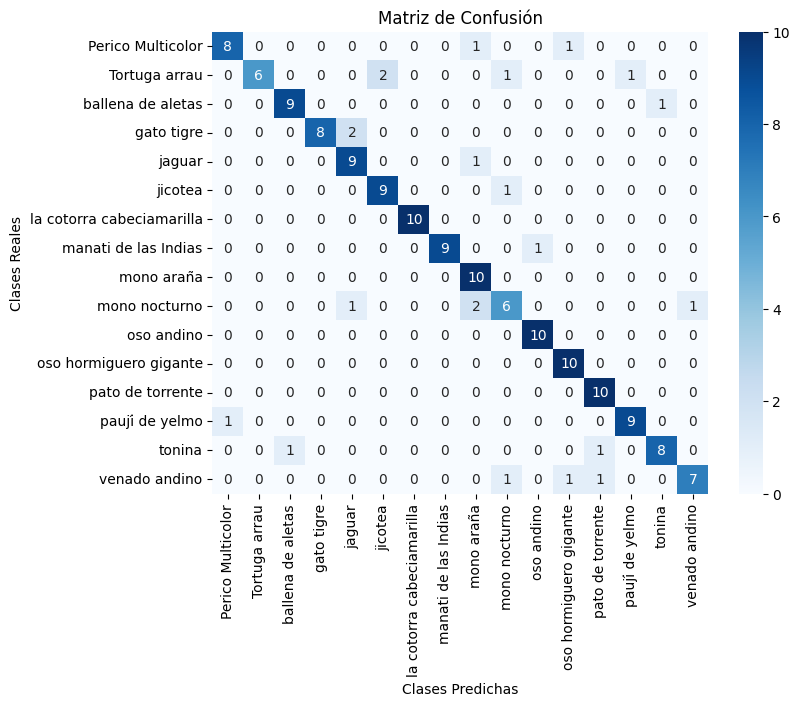

Informe de Clasificación:

                           precision    recall  f1-score   support

        Perico Multicolor       0.89      0.80      0.84        10
            Tortuga arrau       1.00      0.60      0.75        10
        ballena de aletas       0.90      0.90      0.90        10
               gato tigre       1.00      0.80      0.89        10
                   jaguar       0.75      0.90      0.82        10
                  jicotea       0.82      0.90      0.86        10
la cotorra cabeciamarilla       1.00      1.00      1.00        10
     manati de las Indias       1.00      0.90      0.95        10
              mono araña       0.71      1.00      0.83        10
            mono nocturno       0.67      0.60      0.63        10
               oso andino       0.91      1.00      0.95        10
   oso hormiguero gigante       0.83      1.00      0.91        10
         pato de torrente       0.83      1.00      0.91        10
          paují de yelmo       0.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# Ruta del modelo guardado
model_path = '/content/drive/MyDrive/Modelos/modelo_vgg16_v4_16cat3.h5'
model = load_model(model_path)

# Crear un ImageDataGenerator para el conjunto de test (normalizando las imágenes)
test_datagen = ImageDataGenerator(rescale=1./255)

# Directorio del conjunto de test
test_dir = '/content/drive/MyDrive/dataset_peligro_de_extincion/test'

# Crear el generador para el conjunto de test:
test_generator = test_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224, 224),
    batch_size=32,
    color_mode="rgb",
    class_mode='categorical',  # 'categorical' para clasificación multiclase
    shuffle=False  # Importante para mantener el orden de las etiquetas verdaderas
)

# Calcular el número de pasos necesarios y convertirlo a entero
steps = int(np.ceil(test_generator.samples / test_generator.batch_size))

# Realizar las predicciones en el conjunto de test
predictions = model.predict(test_generator, steps=steps)

# Convertir las predicciones (probabilidades) en etiquetas
predicted_classes = np.argmax(predictions, axis=1)

# Extraer las etiquetas verdaderas del generador
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Calcular la matriz de confusión
cm = confusion_matrix(true_classes, predicted_classes)

# Mostrar la matriz de confusión con Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Clases Predichas")
plt.ylabel("Clases Reales")
plt.title("Matriz de Confusión")
plt.show()

# Mostrar el informe de clasificación
print("Informe de Clasificación:\n")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


prueba del modelo

In [ ]:
import requests
from PIL import Image
import numpy as np
import io
import tensorflow as tf

# Cargar el modelo guardado (ajusta la ruta según corresponda)
model_path = '/content/drive/MyDrive/Modelos/modelo_vgg16_v4_16cat1.h5'
model = tf.keras.models.load_model(model_path)

# Lista de nombres de clases (ajusta según tu modelo)
class_names = [
    'Perico Multicolor',
    'Tortuga arrau',
    'ballena de aletas',
    'gato tigre',
    'jaguar',
    'jicotea',
    'la cotorra cabeciamarilla',
    'manati de las Indias',
    'mono araña ',
    'mono nocturno',
    'oso andino',
    'oso hormiguero gigante',
    'pato de torrente',
    'paují de yelmo ',
    'tonina',
    'venado andino',

]

# Tamaño de la imagen de entrada
IMG_SIZE = 224

def classify_image_from_url(url):
    try:
        # Descargar la imagen desde la URL
        response = requests.get(url)
        response.raise_for_status()  # Asegura que la descarga fue exitosa
        image_data = response.content

        # Abrir la imagen con PIL
        image = Image.open(io.BytesIO(image_data))

        # Asegurarse de que la imagen esté en formato RGB
        if image.mode != "RGB":
            image = image.convert("RGB")

        # Redimensionar la imagen a (IMG_SIZE, IMG_SIZE)
        image = image.resize((IMG_SIZE, IMG_SIZE))

        # Convertir la imagen a un array y normalizar a [0,1]
        image_array = np.array(image) / 255.0

        # Expandir dimensiones para crear un batch de tamaño 1
        image_array = np.expand_dims(image_array, axis=0)

        # Realizar la predicción
        predictions = model.predict(image_array)
        predicted_class = np.argmax(predictions, axis=1)[0]
        probability = np.max(predictions)

        return class_names[predicted_class], probability
    except Exception as e:
        print("Error al procesar la imagen:", e)
        return None, None

# Ejemplo de uso:
url = input("")
label, prob = classify_image_from_url(url)
if label is not None:
    print("La imagen fue clasificada como:", label)
    print("Con una probabilidad de:", prob)
else:
    print("No se pudo clasificar la imagen.")


https://lh3.googleusercontent.com/proxy/Gi5qnyuOZ6KqrC4nSrpdwjbhLSyRmHZrHj_R8_n-U8ACSZMNdhhH8YKr6jpAr6WuE36PaazldPles3RlQDpi4OURiqPIQRqxBC45BUyFVH80doWAdssrr-Q
Error al procesar la imagen: 404 Client Error: Not Found for url: https://lh3.googleusercontent.com/proxy/Gi5qnyuOZ6KqrC4nSrpdwjbhLSyRmHZrHj_R8_n-U8ACSZMNdhhH8YKr6jpAr6WuE36PaazldPles3RlQDpi4OURiqPIQRqxBC45BUyFVH80doWAdssrr-Q
No se pudo clasificar la imagen.


desde aqui la pagina


INSTALACION DE LO NECESARIO

In [ ]:
!pip install pyngrok
!pip install streamlit


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 48.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 5.1 MB/s eta 0:00:00


autotoken


In [ ]:
!ngrok authtoken 2u3j0TEwDK6GRvPFXeMY6MY7RZd_6AnBZT22Y5NPLUPSAtahB

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Iniciar la aplicación Streamlit en un puerto específico
from pyngrok import ngrok
import os

# Abre un túnel en el puerto 8501 (el puerto por defecto de Streamlit)
public_url = ngrok.connect(8501)

# Iniciar Streamlit
os.system('!streamlit run /content/drive/MyDrive/front/app23.py')

# Mostrar la URL pública de ngrok
print('La aplicación está corriendo en:', public_url)


La aplicación está corriendo en: NgrokTunnel: "https://b2df-34-30-187-242.ngrok-free.app" -> "http://localhost:8501"


Apertura de mi pagina


In [ ]:
!streamlit run /content/drive/MyDrive/front/app23.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.30.187.242:8501

2025-03-11 00:18:07.242907: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741652287.273534    1062 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741652287.283235    1062 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-11 00:18:07.312861: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebui

  Stopping...
  Stopping...
